# **Zillow ADS Preliminary Analysis**

In [1]:
# Importing Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn as sk

## Load the Datasets

In [ ]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client. 
# Please follow the steps as instructed when you run the following commands. 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

We must load the datasets that are needed to train our machine learning algorithms, handle our data, and to make predictions.

It should be noted that these datasets were the ones provided when entering the competition amd accepting the Terms and Conditions.

In [ ]:
# train = pd.read_csv('../input/train_2016_v2.csv' , parse_dates=["transactiondate"]) 
# properties = pd.read_csv('../input/properties_2016.csv')   
# test = pd.read_csv('../input/sample_submission.csv') 
# test= test.rename(columns={'ParcelId': 'parcelid'})   #To make it easier for merging datasets on same column_id later

In [ ]:
# https://drive.google.com/file/d/1U-1rtYTUk4-_n3GWge_uBjgnsJc80cn4/view?usp=sharing
fileid = '1U-1rtYTUk4-_n3GWge_uBjgnsJc80cn4'   
filename = 'train_2016_v2.csv'
downloaded = drive.CreateFile({'id':fileid}) 
downloaded.GetContentFile(filename)  
train = pd.read_csv(filename, parse_dates=["transactiondate"])

In [ ]:
train.head(3)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01


In [ ]:
train.tail(3)

,parcelid,logerror,transactiondate
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


Since this is for a Colab notebook, we have commented out the above variables in order to implement the csv files from Google Drive directly

In [ ]:
# https://drive.google.com/file/d/1L2EvrHoBREGb0Yh6OrScd8PU2Bvm6RVo/view?usp=sharing
fileid = '1L2EvrHoBREGb0Yh6OrScd8PU2Bvm6RVo'   
filename = 'properties_2016.csv'
downloaded = drive.CreateFile({'id':fileid}) 
downloaded.GetContentFile(filename)  
properties = pd.read_csv(filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,32,34,49,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
properties.head(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN


In [ ]:
# https://drive.google.com/file/d/15D754PtBPHg7e27bKei6E4d1md2Gwao0/view?usp=sharing
fileid = '15D754PtBPHg7e27bKei6E4d1md2Gwao0'   
filename = 'sample_submission.csv'
downloaded = drive.CreateFile({'id':fileid}) 
downloaded.GetContentFile(filename)  
test = pd.read_csv(filename)

In [ ]:
test.head(3)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0


In [ ]:
test = test.rename(columns={'ParcelId': 'parcelid'})  #To make it easier for merging datasets on same column_id later

##Preliminary research on given data

df_train is a merged dataframe consist of original training data(parcelid and logerror only) and property data(home features) 

In [ ]:
df_train_res = train.merge(properties, how='left', on='parcelid') 
df_train_res.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13


In [ ]:
df_train_res.shape

(90275, 60)

#### data types

In [ ]:
df_train_res.dtypes.head(34)

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt  

In [ ]:
df_train_res["regionidzip"]  

0        96370.0
1        96962.0
2        96293.0
3        96222.0
4        96961.0
          ...   
90270    96364.0
90271    96327.0
90272    96478.0
90273    96133.0
90274    96244.0
Name: regionidzip, Length: 90275, dtype: float64

In [ ]:
df_train_res.dtypes.tail(30)

poolsizesum                   float64
pooltypeid10                  float64
pooltypeid2                   float64
pooltypeid7                   float64
propertycountylandusecode      object
propertylandusetypeid         float64
propertyzoningdesc             object
rawcensustractandblock        float64
regionidcity                  float64
regionidcounty                float64
regionidneighborhood          float64
regionidzip                   float64
roomcnt                       float64
storytypeid                   float64
threequarterbathnbr           float64
typeconstructiontypeid        float64
unitcnt                       float64
yardbuildingsqft17            float64
yardbuildingsqft26            float64
yearbuilt                     float64
numberofstories               float64
fireplaceflag                  object
structuretaxvaluedollarcnt    float64
taxvaluedollarcnt             float64
assessmentyear                float64
landtaxvaluedollarcnt         float64
taxamount   

#### null data

In [ ]:
graphData = df_train_res.isna().sum(axis=0).reset_index(name="count")
graphData = graphData.sort_values(by='count')
graphData.columns=['features','count']
graphData['ratio']=graphData['count']/df_train_res.shape[0]
graphData.tail(5)

,features,count,ratio
48,yardbuildingsqft26,90180,0.998948
43,storytypeid,90232,0.999524
5,basementsqft,90232,0.999524
15,finishedsquarefeet13,90242,0.999634
8,buildingclasstypeid,90259,0.999823


In [ ]:
graphData.head(5)

,features,count,ratio
0,parcelid,0,0.0
27,longitude,0,0.0
35,propertylandusetypeid,0,0.0
37,rawcensustractandblock,0,0.0
39,regionidcounty,0,0.0


In [ ]:
empty_features = graphData[graphData['ratio']>0.95]["features"].tolist()

In [ ]:
empty_features

['finishedsquarefeet15',
 'yardbuildingsqft17',
 'hashottuborspa',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'pooltypeid2',
 'pooltypeid10',
 'poolsizesum',
 'decktypeid',
 'finishedsquarefeet6',
 'typeconstructiontypeid',
 'architecturalstyletypeid',
 'fireplaceflag',
 'yardbuildingsqft26',
 'storytypeid',
 'basementsqft',
 'finishedsquarefeet13',
 'buildingclasstypeid']

In [ ]:
len(empty_features)

18

In [ ]:
# graphData.plot.barh(y='count',x='features').tick_params(axis='y', width=0.3)
# # failed graph, too crowded

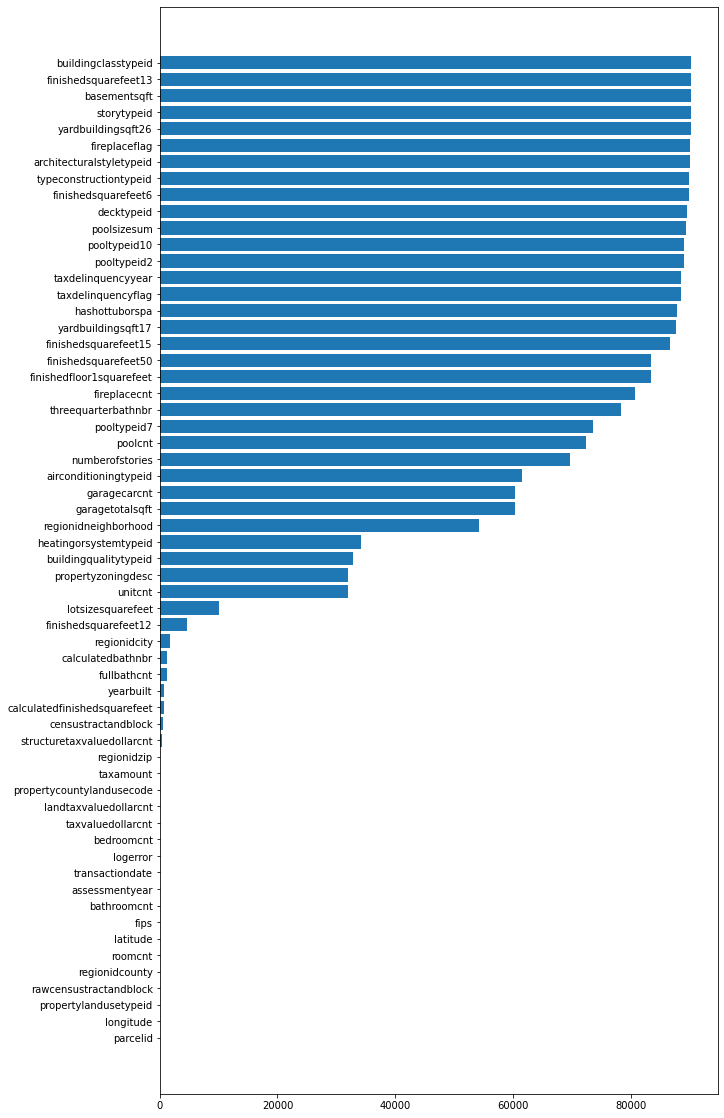

In [ ]:
figs, axes = plt.subplots(figsize=(10,20))
new_index = np.arange(graphData.shape[0])
axes.barh(new_index, graphData['count'].values)
plt.yticks(new_index, graphData["features"].values)
plt.show()

From the index, we extract some interesting features to evaluate:

    logerror; 
    transactiondate
    bathroomcnt;
    bedroomcnt;
    PropertyLandUseTypeID; 
    yearbuilt;
    taxvaluedollarcnt;



full dictionary of indexes can be found at https://www.kaggle.com/c/zillow-prize-1/data under zillow_data_dictionary.xlsx



#### note:


    regionidcounty;
    regionidcity;
    regionidcity;
    regionidneighborhood;
  above features don't have proper dictionaries, we only know numbers but not meanings

  ex:

In [ ]:
df_train_res["regionidcounty"].head(2)

0    3101.0
1    1286.0
Name: regionidcounty, dtype: float64

####logerror:

In [ ]:
print("mean:\t",df_train_res["logerror"].mean())
print("median:\t",df_train_res["logerror"].median())
print("std:\t",df_train_res["logerror"].std())


mean:	 0.011457219606756682
median:	 0.006
std:	 0.16107883536718484


In [ ]:
df_train_res["logerror"].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

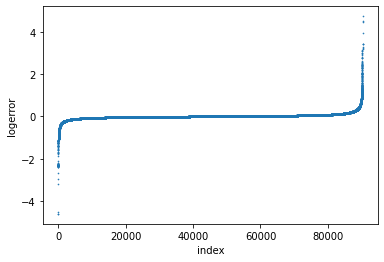

In [ ]:
plt.scatter(range(df_train_res.index.size), np.sort(df_train_res.logerror.values),s=0.4)
plt.xlabel('index')
plt.ylabel('logerror')
plt.show()

(array([3.0000e+00, 2.0000e+00, 4.3000e+01, 1.1500e+02, 7.6615e+04,
        1.3271e+04, 1.5800e+02, 5.1000e+01, 1.3000e+01, 4.0000e+00]),
 array([-4.605 , -3.6708, -2.7366, -1.8024, -0.8682,  0.066 ,  1.0002,
         1.9344,  2.8686,  3.8028,  4.737 ]),
 <a list of 10 Patch objects>)

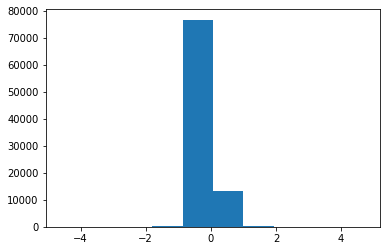

In [ ]:
plt.hist(df_train_res["logerror"])

####transactiondate

In [ ]:
type(df_train_res['transactiondate'][0])

pandas._libs.tslibs.timestamps.Timestamp

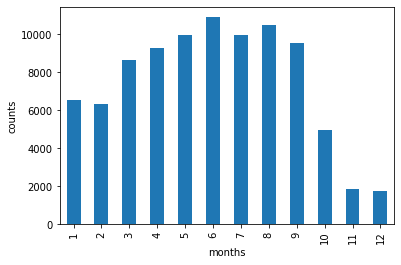

In [ ]:
df_train_res["transactiondate"].groupby(df_train_res["transactiondate"].dt.month).count().plot(kind="bar", xlabel="months", ylabel='counts')

#### group by property land use id

In [ ]:
df_train_res.groupby('propertylandusetypeid', as_index=False).size()

,propertylandusetypeid,size
0,31.0,17
1,47.0,1
2,246.0,2376
3,247.0,629
4,248.0,879
5,260.0,62
6,261.0,60637
7,263.0,84
8,264.0,11
9,265.0,356


In [ ]:
df_train_res.groupby('propertylandusetypeid', as_index=False)['logerror'].mean()

,propertylandusetypeid,logerror
0,31.0,-0.034371
1,47.0,1.301000
2,246.0,0.009442
3,247.0,-0.004608
4,248.0,0.005385
5,260.0,0.004606
6,261.0,0.012080
7,263.0,0.104256
8,264.0,0.047591
9,265.0,0.013998


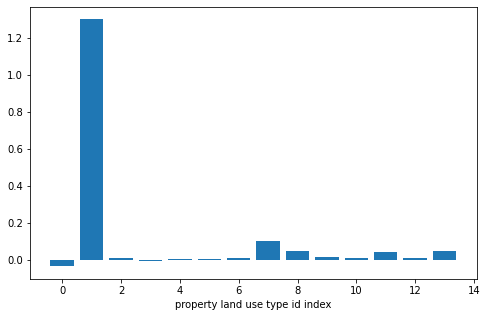

In [ ]:
landuse_mean = df_train_res.groupby('propertylandusetypeid', as_index=False)['logerror'].mean()
fig, ax = plt.subplots(figsize=(8,5))
plt.bar(range(len(landuse_mean)), landuse_mean["logerror"])
ax.set_xlabel("property land use type id index")
plt.show()

####other features

In [ ]:
df_train_res["bedroomcnt"].describe()

count    90275.000000
mean         3.031869
std          1.156436
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: bedroomcnt, dtype: float64

In [ ]:
df_train_res["bedroomcnt"].median()

3.0

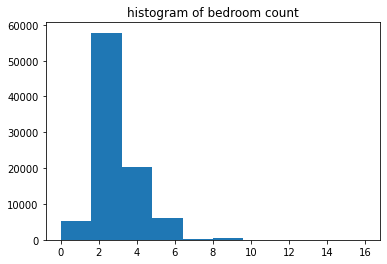

In [ ]:
plt.hist(df_train_res["bedroomcnt"])
plt.title("histogram of bedroom count")
plt.show()

In [ ]:
df_train_res["bathroomcnt"].describe()

count    90275.000000
mean         2.279474
std          1.004271
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: bathroomcnt, dtype: float64

In [ ]:
df_train_res["bathroomcnt"].median()

2.0

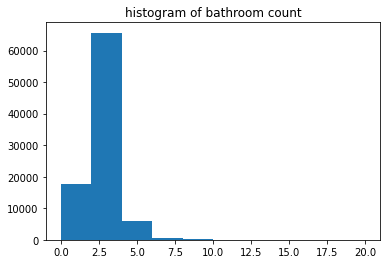

In [ ]:
plt.hist(df_train_res["bathroomcnt"])
plt.title("histogram of bathroom count")
plt.show()

In [ ]:
df_train_res["yearbuilt"].describe()

count    89519.000000
mean      1968.532870
std         23.763475
min       1885.000000
25%       1953.000000
50%       1970.000000
75%       1987.000000
max       2015.000000
Name: yearbuilt, dtype: float64

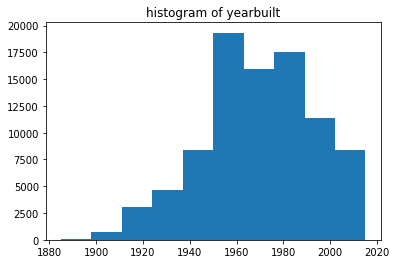

In [ ]:
plt.hist(df_train_res["yearbuilt"])
plt.title("histogram of yearbuilt")
plt.show()

In [ ]:
df_train_res["taxvaluedollarcnt"].describe()

count    9.027400e+04
mean     4.576726e+05
std      5.548844e+05
min      2.200000e+01
25%      1.990232e+05
50%      3.428720e+05
75%      5.405890e+05
max      2.775000e+07
Name: taxvaluedollarcnt, dtype: float64

In [ ]:
df_train_res["taxvaluedollarcnt"].mean()

457672.627356714

### feature correlations

remove columns that have type other than float and int

highly correlated variables are removed from the correlation matrix as they provide repeated and less meaningful information 

In [ ]:
train_res_new = df_train_res.drop(empty_features, axis = 1)

In [ ]:
train_res_new=train_res_new.select_dtypes('float', 'int')

In [ ]:
train_corr=train_res_new.corr().abs()

In [ ]:
upper_tri = train_corr.where(np.triu(np.ones(train_corr.shape),k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [ ]:
len(to_drop)

7

In [ ]:
train_res_new = train_res_new.drop(to_drop, axis=1) 

In [ ]:
reduced_corr = train_res_new.corr()

In [ ]:
reduced_corr.shape

(31, 31)

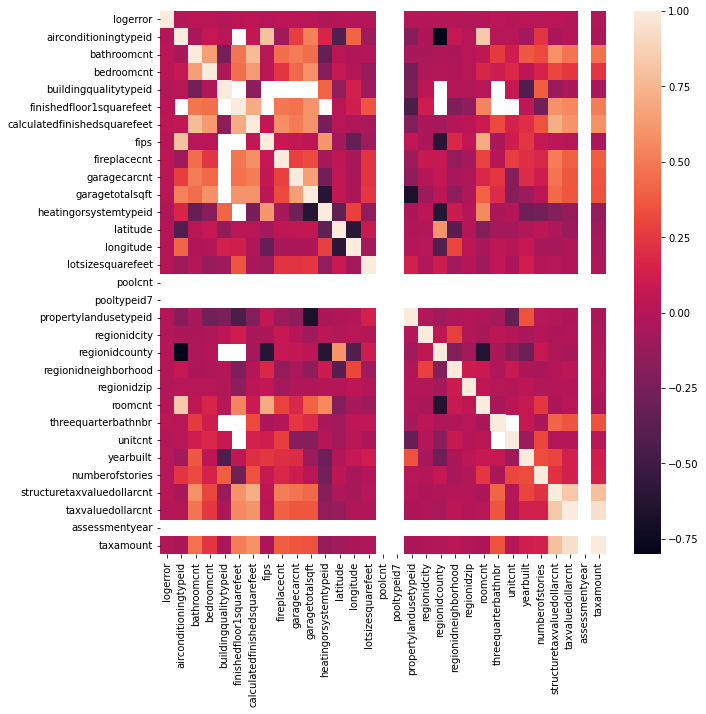

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(reduced_corr)
plt.show()

# **Original Zillow ADS**

---


**Zillow Zestimate ADS:** https://www.kaggle.com/c/zillow-prize-1/overview

**ADS Intended Goal and Specifications:** https://www.kaggle.com/c/zillow-prize-1/data 

**Kaggle Original Solution Code:** https://www.kaggle.com/code/zusmani/scrpt/script 


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import random
import datetime as dt
import gc

import seaborn as sns #python visualization library 
color = sns.color_palette()

#%matplotlib inline
np.random.seed(1)

### Analyze the Dimensions of our Datasets

In [ ]:
print("Training Data Size:" + str(train.shape))
print("Property Data Size:" + str(properties.shape))
print("Sample Data Size:" + str(test.shape))

Training Data Size:(90275, 3)
Property Data Size:(2985217, 58)
Sample Data Size:(2985217, 7)


### Type-Converting the DataSet ###

Processing some of the algorithms can be made quicker if data representation is made in format **int/float32** instead of the format **int/float64.** Therefore we implement the following lines of code in order to made sure all of our columns are in the float32 type

In [ ]:
for c, dtype in zip(properties.columns, properties.dtypes):
    if dtype == np.float64:        
        properties[c] = properties[c].astype(np.float32)
    if dtype == np.int64:
        properties[c] = properties[c].astype(np.int32)


for column in test.columns:
    if test[column].dtype == int:
        test[column] = test[column].astype(np.int32)
    if test[column].dtype == float:
        test[column] = test[column].astype(np.float32)

### Let's do some feature engineering

In [ ]:
### Let's do some feature engineering

#living area proportions 
properties['living_area_prop'] = properties['calculatedfinishedsquarefeet'] / properties['lotsizesquarefeet']
#tax value ratio
properties['value_ratio'] = properties['taxvaluedollarcnt'] / properties['taxamount']
#tax value proportions
properties['value_prop'] = properties['structuretaxvaluedollarcnt'] / properties['landtaxvaluedollarcnt']

### Merging the Datasets ###

In [ ]:
df_train = train.merge(properties, how='left', on='parcelid') 
df_test = test.merge(properties, how='left', on='parcelid')

In [ ]:
df_train.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,living_area_prop,value_ratio,value_prop
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,360170.0,2015.0,237416.0,6735.879883,NaN,NaN,6.037107e+13,0.223698,53.470371,0.517042
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,585529.0,2015.0,239071.0,10153.019531,NaN,NaN,NaN,0.621191,57.670429,1.449185
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,119906.0,2015.0,57912.0,11484.480469,NaN,NaN,6.037464e+13,0.194082,10.440699,1.070486


In [ ]:
df_test.head(3)

,parcelid,201610,201611,201612,201710,201711,201712,airconditioningtypeid,architecturalstyletypeid,basementsqft,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,living_area_prop,value_ratio,value_prop
0,10754147,0,0,0,0,0,0,NaN,NaN,NaN,...,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10759547,0,0,0,0,0,0,NaN,NaN,NaN,...,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10843547,0,0,0,0,0,0,NaN,NaN,NaN,...,1413387.0,2015.0,762631.0,20800.369141,NaN,NaN,NaN,1.157581,67.950089,0.853304


### Remove some unused variables in order to retain some memory

In [ ]:
# del properties, train
# We preserve unused variables for later analysis 
gc.collect();

print('Memory usage reduction...')
df_train[['latitude', 'longitude']] /= 1e6
df_test[['latitude', 'longitude']] /= 1e6

df_train['censustractandblock'] /= 1e12
df_test['censustractandblock'] /= 1e12


Memory usage reduction...


### We will conduct some pre-exploratory analysis to identify the missing values within our datasets.

We incorporated procedures from user Nikunj in order to deal with missing values within our datasets 

Reference: https://www.kaggle.com/nikunjm88/carefully-dealing-with-missing-values 

In [ ]:
# Let's do some engineering with the fireplaceflag variable
print(df_train.fireplaceflag.isnull().sum())
print(df_train.fireplacecnt.isnull().sum())

# By using fireplacecnt variable we can recover some of the fields of fireplaceflag
df_train['fireplaceflag']= "No"
df_train.loc[df_train['fireplacecnt']>0,'fireplaceflag']= "Yes"

# Remaining Missing fireplacecnt will be replaced with 0
index = df_train.fireplacecnt.isnull()
df_train.loc[index,'fireplacecnt'] = 0

#Tax deliquency flag - assume if it is null then doesn't exist
index = df_train.taxdelinquencyflag.isnull()
df_train.loc[index,'taxdelinquencyflag'] = "None"

90053
80668


In [ ]:
# Similar step performed for Pool/Spa/hot tub
print(df_train.hashottuborspa.value_counts())
print(df_train.pooltypeid10.value_counts())

#lets remove 'pooltypeid10' as has more missing values
print(df_train.hashottuborspa.value_counts())
print(df_train.pooltypeid10.value_counts())

#Assume if the pooltype id is null then pool/hottub doesnt exist 
index = df_train.pooltypeid2.isnull()
df_train.loc[index,'pooltypeid2'] = 0

index = df_train.pooltypeid7.isnull()
df_train.loc[index,'pooltypeid7'] = 0

index = df_train.poolcnt.isnull()
df_train.loc[index,'poolcnt'] = 0


True    2365
Name: hashottuborspa, dtype: int64
1.0    1161
Name: pooltypeid10, dtype: int64
True    2365
Name: hashottuborspa, dtype: int64
1.0    1161
Name: pooltypeid10, dtype: int64


### Label Encoding For Machine Learning & Filling Missing Values ###

We are now label encoding our datasets. All of the machine learning algorithms employed in scikit learn assume that the data being fed to them is in numerical form. LabelEncoding ensures that all of our categorical variables are in numerical representation. Also note that we are filling the missing values in our dataset with a zero before label encoding them. This is to ensure that label encoder function does not experience any problems while carrying out its operation.

In [ ]:
from sklearn.preprocessing import LabelEncoder  

lbl = LabelEncoder()
for c in df_train.columns:
    df_train[c]=df_train[c].fillna(0)
    if df_train[c].dtype == 'object':
        lbl.fit(list(df_train[c].values))
        df_train[c] = lbl.transform(list(df_train[c].values))

for c in df_test.columns:
    df_test[c]=df_test[c].fillna(0)
    if df_test[c].dtype == 'object':
        lbl.fit(list(df_test[c].values))
        df_test[c] = lbl.transform(list(df_test[c].values))     

### Removing the Outliers

In [ ]:
log_errors = df_train['logerror']
df_train = df_train[df_train.logerror < np.percentile(log_errors, 99.5)]
df_train = df_train[df_train.logerror > np.percentile(log_errors, 0.5)]


### Rearranging the DataSets ###

We now drop the features which do not serve an useful purpose. We will then split our data and divide it into representation to make it clear which features are to be treated as the determinants in predicting the outcome for our target feature. We make sure to include the same features in the test set as the ones which were included in the training set.

In [ ]:
x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                         'propertycountylandusecode' ], axis=1)

x_test = df_test.drop(['parcelid', 'propertyzoningdesc',
                       'propertycountylandusecode', '201610', '201611', 
                       '201612', '201710', '201711', '201712'], axis = 1) 

x_train = x_train.values
y_train = df_train['logerror'].values

### Cross Validation ###

We divide our datasets into training and validation sets so that we can monitor and test the progress of our machine learning algorithm. This would let us know when our model may be over or under-fitting on a dataset which we have employed.

In [ ]:
from sklearn.model_selection import train_test_split

X = x_train
y = y_train 

Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2, random_state=42)


### Implement the Xgboost

We now can select the parameters for Xgboost and monitor the progress of results on our validation set. The explanation of the Xgboost parameters and what they do can be found through the following link: http://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dvalid = xgb.DMatrix(Xvalid, label=yvalid)
dtest = xgb.DMatrix(x_test.values)

# Try different parameters! 
xgb_params = {'min_child_weight': 5, 'eta': 0.035, 'colsample_bytree': 0.5, 'max_depth': 4,
            'subsample': 0.85, 'lambda': 0.8, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1, 'gamma' : 0,
            'eval_metric': 'mae', 'objective': 'reg:linear' }           

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

model_xgb = xgb.train(xgb_params, dtrain, 1000, watchlist, early_stopping_rounds=100,
                  maximize=False, verbose_eval=10)

[0]	train-mae:0.474036	valid-mae:0.471898
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[10]	train-mae:0.334328	valid-mae:0.332244
[20]	train-mae:0.238427	valid-mae:0.236558
[30]	train-mae:0.173321	valid-mae:0.171623
[40]	train-mae:0.129685	valid-mae:0.128215
[50]	train-mae:0.1011	valid-mae:0.099863
[60]	train-mae:0.082927	valid-mae:0.081904
[70]	train-mae:0.071828	valid-mae:0.071027
[80]	train-mae:0.065345	valid-mae:0.064763
[90]	train-mae:0.06166	valid-mae:0.061288
[100]	train-mae:0.059599	valid-mae:0.059366
[110]	train-mae:0.058428	valid-mae:0.058296
[120]	train-mae:0.057761	valid-mae:0.057707
[130]	train-mae:0.057369	valid-mae:0.05738
[140]	train-mae:0.057107	valid-mae:0.057194
[150]	train-mae:0.056955	valid-mae:0.057097
[160]	train-mae:0.056837	valid-mae:0.057025
[170]	train-mae:0.056759	valid-mae:0.056985
[180]	train-mae:0.056702	valid-mae:0.056968
[190]	train-mae:0.056649	valid-mae:

###Predicting the results###

We can now predict the target variable for our test dataset. All we need to do now is fit the already trained model on the test dataset which we made from merging the sample file with the properties dataset.

In [ ]:
Predicted_test_xgb = model_xgb.predict(dtest)

In [ ]:
Predicted_test_xgb

array([-0.05235672, -0.01327515,  0.00347465, ...,  0.10479754,
        0.10479754,  0.10479754], dtype=float32)

### Submitting the Results ###

Since we do not need to export the predicitons to csv file, we commented out the cells below to save memory

In [ ]:
# # Once again load the file and start submitting the results in each column #
# # sample_file = pd.read_csv('../input/sample_submission.csv') 

# # https://drive.google.com/file/d/15D754PtBPHg7e27bKei6E4d1md2Gwao0/view?usp=sharing
# fileid = '15D754PtBPHg7e27bKei6E4d1md2Gwao0'   
# filename = 'sample_submission.csv'
# downloaded = drive.CreateFile({'id':fileid}) 
# downloaded.GetContentFile(filename)  
# sample_file = pd.read_csv(filename)
# sample_file

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2985212,168176230,0,0,0,0,0,0
2985213,14273630,0,0,0,0,0,0
2985214,168040630,0,0,0,0,0,0
2985215,168040830,0,0,0,0,0,0


In [ ]:
# for c in sample_file.columns[sample_file.columns != 'ParcelId']:
#     sample_file[c] = Predicted_test_xgb

# print('Preparing the csv file ...')
# sample_file.to_csv('xgb_predicted_results.csv', index=False, float_format='%.4f')
# print("Finished writing the file")
# # failed to write to the csv file in drive, but predictions are stored in the variable sample_file

Preparing the csv file ...
Finished writing the file


In [ ]:
# len(sample_file)

2985217

In [ ]:
# sample_file

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,-0.052357,-0.052357,-0.052357,-0.052357,-0.052357,-0.052357
1,10759547,-0.013275,-0.013275,-0.013275,-0.013275,-0.013275,-0.013275
2,10843547,0.003475,0.003475,0.003475,0.003475,0.003475,0.003475
3,10859147,0.116168,0.116168,0.116168,0.116168,0.116168,0.116168
4,10879947,0.061894,0.061894,0.061894,0.061894,0.061894,0.061894
...,...,...,...,...,...,...,...
2985212,168176230,0.104798,0.104798,0.104798,0.104798,0.104798,0.104798
2985213,14273630,0.104798,0.104798,0.104798,0.104798,0.104798,0.104798
2985214,168040630,0.104798,0.104798,0.104798,0.104798,0.104798,0.104798
2985215,168040830,0.104798,0.104798,0.104798,0.104798,0.104798,0.104798


# **ADS Evaluation** 

####Sample submission logerror predictions:

In [ ]:
def describe_arr(array):
  print("mean:",array.mean())
  print("median:",np.median(array))
  print("min:",array.min())
  print("max:",array.max())

In [ ]:
describe_arr(Predicted_test_xgb)

mean: 0.013021984
median: 0.011305124
min: -0.25805414
max: 0.34636483


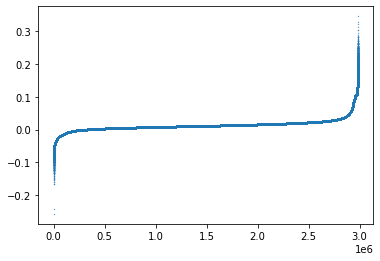

In [ ]:
plt.scatter(range(len(Predicted_test_xgb)), np.sort(Predicted_test_xgb),s=0.1)

####model prediction on test set:

Because we do not have test set for the submission version of logerror prediction, which was the scoring metric for Kaggle competition. Instead, below, we analyze the prediction on test set. 

In [ ]:
y_pred = model_xgb.predict(dvalid)

In [ ]:
describe_arr(y_pred)

mean: 0.0095409425
median: 0.009667605
min: -0.109619394
max: 0.23125656


Text(0.5, 1.0, 'scatter plot for prediction')

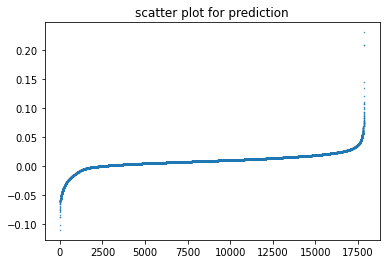

In [ ]:
plt.scatter(range(len(y_pred)), np.sort(y_pred),s=0.2)
plt.title("scatter plot for prediction")

####real test data:

In [ ]:
describe_arr(yvalid)

mean: 0.011792033120734027
median: 0.007
min: -0.4878
max: 0.7066


Text(0.5, 1.0, 'scatter plot for real data')

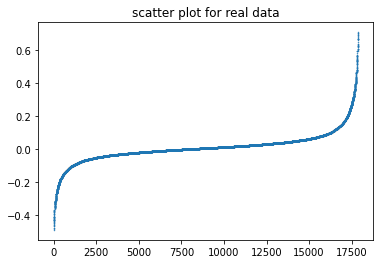

In [ ]:
plt.scatter(range(len(yvalid)), np.sort(yvalid),s=0.2)
plt.title("scatter plot for real data")

####classification of logerror

a set a threshold of 0.1. 

For logerror within 0.1 to -0.1 interval, we say we have a good estimate for this estate and represent it as 1. If the logerror is larger, it is replaced with 0, showing that it's an inaccurate estimate

In [ ]:
import copy 
def classify_log(array):
  res = copy.deepcopy(array)
  for i in range(len(res)):
    if abs(res[i])<=0.1: res[i]=1
    else: res[i]=0
  return res

real test data:

In [ ]:
ytest_class = classify_log(yvalid)

In [ ]:
unique, counts = np.unique(ytest_class, return_counts=True)
dict(zip(unique, counts))

{0.0: 2715, 1.0: 15159}

predicted data:

In [ ]:
ypred_class = classify_log(y_pred)

In [ ]:
unique, counts = np.unique(ypred_class, return_counts=True)
dict(zip(unique, counts))

{0.0: 14, 1.0: 17860}

### performance and fairness

In [ ]:
import sklearn.metrics as skm
print("accuracy:", skm.accuracy_score(ytest_class, ypred_class))
print("AUC:", skm.roc_auc_score(ytest_class, ypred_class))
print('precision:', skm.precision_score(ytest_class, ypred_class))
print('recall:', skm.recall_score(ytest_class, ypred_class))
print('average_precision:', skm.average_precision_score(ytest_class, ypred_class))

accuracy: 0.8481033903994629
AUC: 0.5010582484959611
precision: 0.8483762597984322
recall: 0.999538228115311
average_precision: 0.8483761337950155


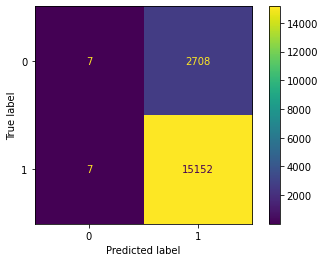

In [ ]:
cm = skm.confusion_matrix(ytest_class, ypred_class)
skm.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [ ]:
cm

array([[    7,  2708],
       [    7, 15152]])

In [ ]:
true_positive=cm[1,1] 
false_positive=cm[0,1]
true_negative=cm[0,0]
false_negative=cm[1,0]

In [ ]:
print("false positive rate is: {:.4f}".format(false_positive/(false_positive+true_negative)))
print("false negative rate is: {:.4f}".format(false_negative/(false_negative+true_positive)))

false positive rate is: 0.9974
false negative rate is: 0.0005


### attempt to analyze subpopulation accuracy
Because the ADS converted dataframes into numerical values when spliting training and test dataset. it is hard to reconstruct test set dataframe and reassociate predictions with features. 

In addition, many features like buildingclasstypeid, storytypeid, architecturalstyletypeid obtains about 99% of null data. And features like regionidcounty, regionidcity, and regionidneighborhood do not have have human-interpretable dicitonary on Kaggle. 

Therefore, although we originally planned to evaluate ADS's accuracy across subpopulations, we failed to analyze it due to ADS's encoding and preprocessing methods as well as missing documentations. 

In the cells below, we attempted to analyze performance of subgroups based on "propertylandusetypeid" by creating a fairlearn.metrics.MetricFrame taught in lab 4. However, in the process of coding, we realized we could not reconstruct predictions' associated features. Thus we failed to anaylze fairness and subpopulation accuracy for this ADS due to above reasons. 

In [ ]:
# !pip install --upgrade fairlearn==v0.6.0

In [ ]:
# from fairlearn.metrics import MetricFrame
# from fairlearn.metrics import selection_rate, false_negative_rate, false_positive_rate

# import functools
# import numpy as np

In [ ]:
# df_ytrain, df_yvalid = train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
# def insensitive_roc_auc(y_true, y_score):
#     #to handle subgroups with only one class.
#     if sum(y_true)!=len(y_true) and sum(y_true)!=0:
#         return skm.roc_auc_score(y_true, y_score)
#     else:
#         return np.nan

# def samplesize(y_true, y_score):
#     return len(y_true)

# #Metrics 
# metric_fns = {'samplesize': samplesize, 
#               'selection_rate': selection_rate,  # i.e., the percentage of the population which have ‘1’ as their label
#               'FNR': false_negative_rate, 
#               'FPR': false_positive_rate, 
#               'accuracy': skm.accuracy_score,
#               'average_precision': skm.average_precision_score,
#               'roc_auc_score': insensitive_roc_auc 
#               }

# grouped_on_race = MetricFrame(metric_fns,
#                              ytest_class, ypred_class,
#                              sensitive_features=df_yvalid['propertylandusetypeid'])

### XGB factor importance

In [ ]:
weight = model_xgb.get_score(importance_type='weight')

In [ ]:
# removed columns from training set in pre-processing
removed_col = ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode' ]

In [ ]:
# match unreadable coded names to actual feature neams
feat_code = model_xgb.feature_names
feats_names = df_train.drop(removed_col, axis=1).columns

In [ ]:
code_to_names = {}
for key, value in zip(feat_code, feats_names):
      code_to_names[key] = value

In [ ]:
weight_dic = { code_to_names[k]: v for k, v in weight.items() }

In [ ]:
# sort dictionary from largest weight to lowest
import operator
sorted_weight = sorted(weight_dic.items(), key=operator.itemgetter(1), reverse=False)

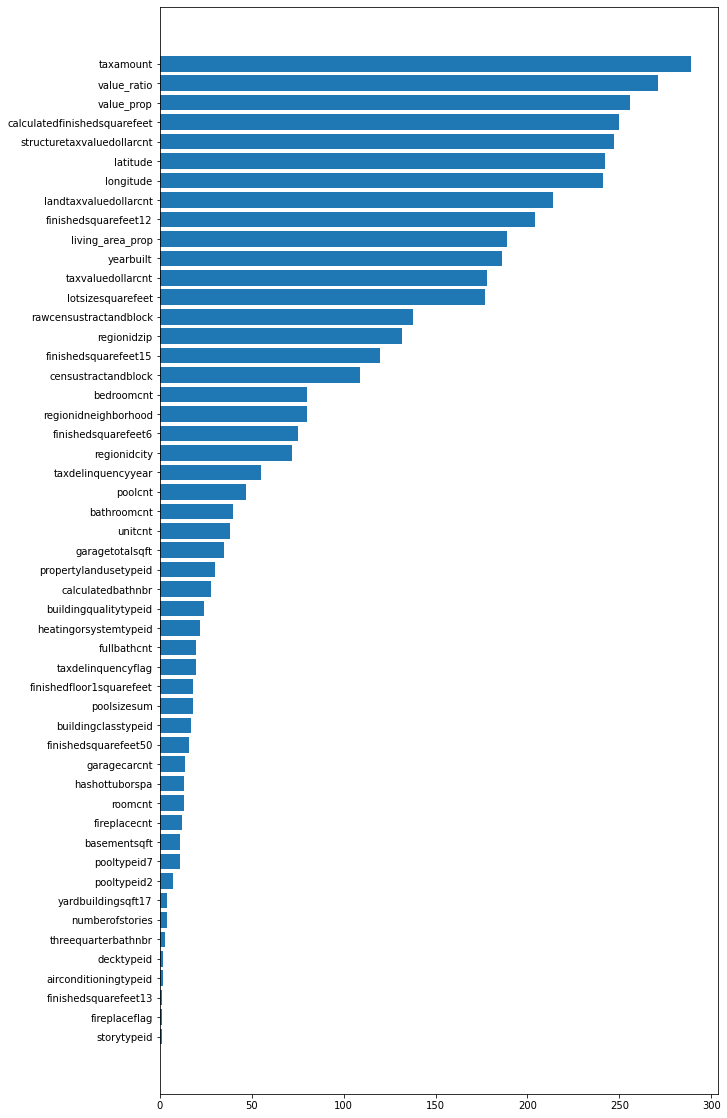

In [ ]:
x, y = zip(*sorted_weight) 
figs, axes = plt.subplots(figsize=(10,20))
plt.barh(x,y)
plt.show()

# Bibliography

Zillow Zestimate ADS: https://www.kaggle.com/c/zillow-prize-1/overview

ADS Intended Goal and Specifications: https://www.kaggle.com/c/zillow-prize-1/data